In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = '/content/drive/MyDrive/개인 연구/강의 수강/(패스트 캠퍼스) 데이터 분석/Ch3 Logistic Regression/advertising.csv'
data = pd.read_csv(data_path)

In [4]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


In [5]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,916.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.128821,55000.000080,180.000100,0.481000,0.50000
std,15.853615,9.018548,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [20]:
data['Ad Topic Line'].nunique()

1000

In [18]:
data['Country'].nunique()

237

[]

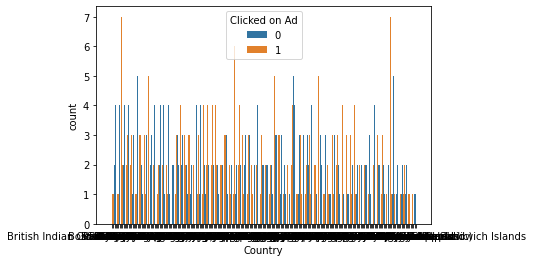

In [19]:
sns.countplot(x='Country', hue='Clicked on Ad', data=data)
plt.plot()

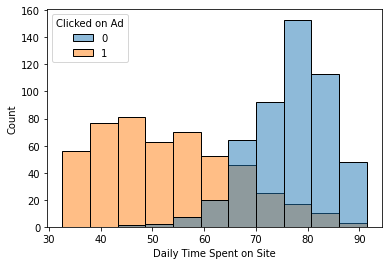

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


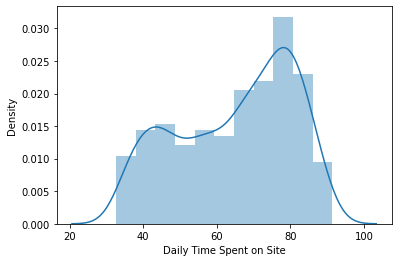

In [15]:
sns.histplot(x='Daily Time Spent on Site', hue='Clicked on Ad', data=data)
plt.show()

sns.distplot(data['Daily Time Spent on Site'])
plt.show()

In [ ]:
sns.histplot(x='Daily Time Spent on Site', hue='Clicked on Ad', data=data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


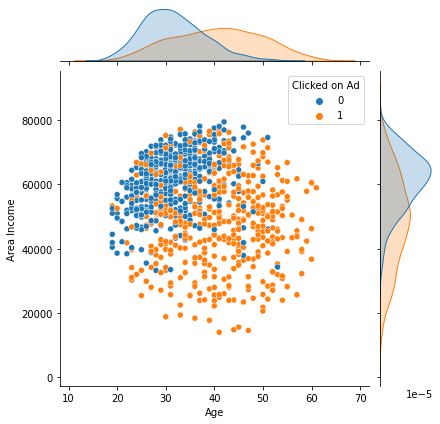

In [10]:
sns.jointplot('Age', 'Area Income', hue='Clicked on Ad', data=data)
plt.show()

[]

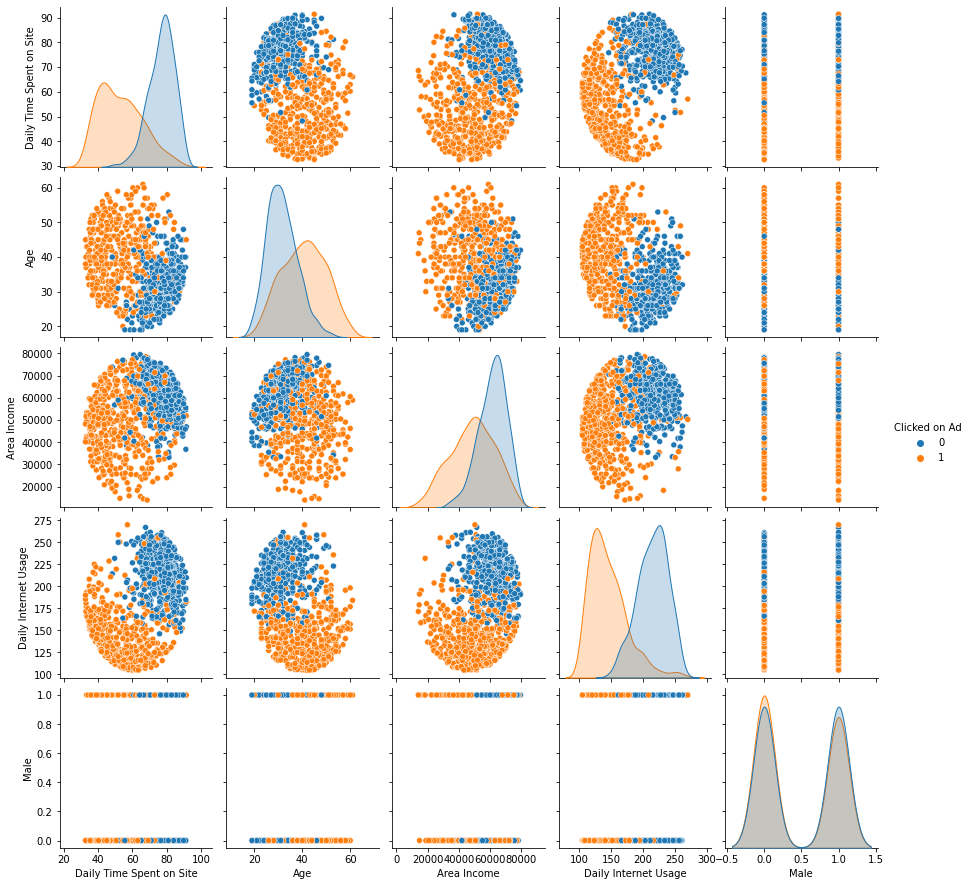

In [11]:
sns.pairplot(data, hue='Clicked on Ad')
plt.plot()

In [ ]:
data = data.drop(['Country'], axis=1)

data['Time_Spent_Band'] = pd.qcut(data['Daily Time Spent on Site'], 4)
data['Age_Band'] = pd.qcut(data['Age'], 5)
data['Area_Income_Band'] = pd.qcut(data['Area Income'], 7)

data['Timestamp'] = pd.to_datetime(data['Timestamp'], format=('%m/%d/%Y %H:%M'))
data['Year'] = data['Timestamp'].dt.year
data['Month'] =data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day
data['Hour'] = data['Timestamp'].dt.hour
data['Minute'] = data['Timestamp'].dt.minute

data = data.drop('Timestamp', axis=1)

In [ ]:
data = pd.get_dummies(data, columns=['Ad Topic Line', 'City'], drop_first=True)
data = pd.get_dummies(data, columns=['Time_Spent_Band', 'Age_Band', 'Area_Income_Band'], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('Clicked on Ad', axis=1)
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Year,Month,Day,Hour,Minute,Ad Topic Line_Adaptive asynchronous attitude,Ad Topic Line_Adaptive context-sensitive application,Ad Topic Line_Adaptive contextually-based methodology,Ad Topic Line_Adaptive demand-driven knowledgebase,Ad Topic Line_Adaptive uniform capability,Ad Topic Line_Advanced 24/7 productivity,Ad Topic Line_Advanced 5thgeneration capability,Ad Topic Line_Advanced didactic conglomeration,Ad Topic Line_Advanced disintermediate data-warehouse,Ad Topic Line_Advanced exuding conglomeration,Ad Topic Line_Advanced full-range migration,Ad Topic Line_Advanced heuristic firmware,Ad Topic Line_Advanced local task-force,Ad Topic Line_Advanced modular Local Area Network,Ad Topic Line_Advanced systemic productivity,Ad Topic Line_Advanced web-enabled standardization,Ad Topic Line_Ameliorated actuating workforce,Ad Topic Line_Ameliorated bandwidth-monitored contingency,Ad Topic Line_Ameliorated client-driven forecast,Ad Topic Line_Ameliorated coherent open architecture,Ad Topic Line_Ameliorated contextually-based collaboration,Ad Topic Line_Ameliorated discrete extranet,Ad Topic Line_Ameliorated exuding encryption,Ad Topic Line_Ameliorated exuding solution,Ad Topic Line_Ameliorated intermediate Graphical User Interface,Ad Topic Line_Ameliorated leadingedge help-desk,Ad Topic Line_Ameliorated local workforce,Ad Topic Line_Ameliorated tangible hierarchy,Ad Topic Line_Ameliorated upward-trending definition,Ad Topic Line_Ameliorated user-facing help-desk,...,City_West Travismouth,City_West Wendyland,City_West William,City_West Zacharyborough,City_Westshire,City_Whiteport,City_Whitneyfort,City_Wilcoxport,City_Williammouth,City_Williamport,City_Williamsborough,City_Williamsfort,City_Williamsmouth,City_Williamsport,City_Williamsside,City_Williamstad,City_Wilsonburgh,City_Wintersfort,City_Wongland,City_Wrightburgh,City_Wrightview,City_Yangside,City_Youngburgh,City_Youngfort,City_Yuton,City_Zacharystad,City_Zacharyton,"Time_Spent_Band_(51.36, 68.215]","Time_Spent_Band_(68.215, 78.548]","Time_Spent_Band_(78.548, 91.43]","Age_Band_(28.0, 33.0]","Age_Band_(33.0, 36.0]","Age_Band_(36.0, 44.0]","Age_Band_(44.0, 61.0]","Area_Income_Band_(39806.844, 48887.127]","Area_Income_Band_(48887.127, 54442.166]","Area_Income_Band_(54442.166, 59669.551]","Area_Income_Band_(59669.551, 63994.789]","Area_Income_Band_(63994.789, 68547.109]","Area_Income_Band_(68547.109, 79484.8]"
48,44.33,37.0,52723.34,123.72,1,2016,1,8,9,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
521,63.26,29.0,54787.37,120.46,1,2016,3,2,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
639,74.06,23.0,40345.49,225.99,0,2016,7,23,6,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
714,71.27,35.0,50147.72,216.03,1,2016,1,11,12,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
148,49.78,46.0,71718.51,152.24,0,2016,6,29,2,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

AttributeError: ignored

In [ ]:
minmax.fit(X_train)
minmax.data_min_

array([   32.6,    19. , 13996.5, ...,     0. ,     0. ,     0. ])

In [ ]:
X_train = pd.DataFrame(minmax.transform(X_train))

X_test = pd.DataFrame(minmax.transform(X_test))
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
0,0.199388,0.428571,0.591355,0.114663,1.0,0.0,0.000000,0.233333,0.391304,0.542373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.521163,0.238095,0.622873,0.094927,1.0,0.0,0.333333,0.033333,0.173913,0.033898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.704742,0.095238,0.402347,0.733806,0.0,0.0,1.000000,0.733333,0.260870,0.305085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.657318,0.380952,0.552026,0.673508,1.0,0.0,0.000000,0.333333,0.521739,0.779661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.292028,0.642857,0.881410,0.287323,0.0,0.0,0.833333,0.933333,0.086957,0.728814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
accuracy_score(y_test, predict)


0.955

In [ ]:
f1_score(y_test, predict)

0.9513513513513514

In [ ]:
confusion_matrix(y_test,predict)

array([[103,   2],
       [  7,  88]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       105
           1       0.98      0.93      0.95        95

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200

